# Exploration of some data from FB surveys
University of Maryland and Facebook have conducted surveys online. Respondents are asked for several COVID-19 related information, including symptoms, behaviors and so on.  
The full database and documentation is available [here](https://gisumd.github.io/COVID-19-API-Documentation/). NB: US is not in the database, but [here](https://delphi.cmu.edu/covid19/ctis/)


In [1]:
import pandas as pd
import numpy as np
import datetime as DT
import requests
import json 

from matplotlib import pyplot as plt

%matplotlib inline  
#widget

In [2]:
from scipy import stats as sps

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import warnings
warnings.filterwarnings('ignore')


## An example: mask wearing trends
Let's have a look at Italy, Germany and UK and their mask wearing habits

### Smoothed data

In [5]:
response = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=daily&country=Italy&daterange=20200423-20220625", verify=False).text
response1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=daily&country=Germany&daterange=20200423-20220625", verify=False).text
response2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask&type=daily&country=United Kingdom&daterange=20200423-20220625", verify=False).text

jsonData = json.loads(response)
jsonData1 = json.loads(response1)
jsonData2 = json.loads(response2)

df_IT = pd.DataFrame.from_dict(jsonData['data'])
df_DE = pd.DataFrame.from_dict(jsonData1['data'])
df_UK = pd.DataFrame.from_dict(jsonData2['data'])


In [6]:
df_IT["survey_date"] = pd.to_datetime(df_IT['survey_date'])
df_DE["survey_date"] = pd.to_datetime(df_DE['survey_date'])
df_UK["survey_date"] = pd.to_datetime(df_UK['survey_date'])

In [7]:
#df_IT

Text(0, 0.5, '% responders wearing masks in public')

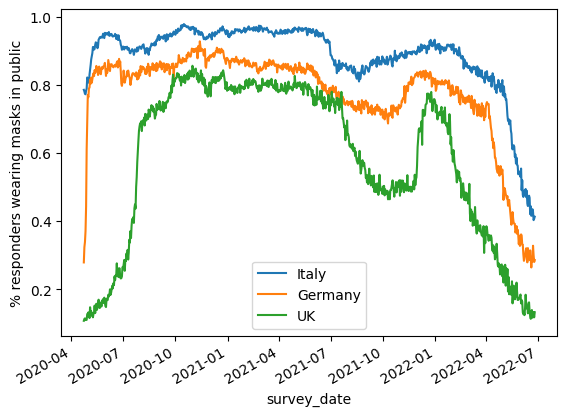

In [8]:
ax = df_IT.plot(x="survey_date", y="percent_mc",label="Italy")
df_DE.plot(x="survey_date", y="percent_mc", ax=ax,label="Germany")
df_UK.plot(x="survey_date", y="percent_mc", ax=ax,label="UK")
ax.set_ylabel("% responders wearing masks in public")

### Breakdown

In [9]:
# Italy

IT_b1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_work_outside_home_1d&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jd1 = json.loads(IT_b1)
df_IT_b1 = pd.DataFrame.from_dict(IT_jd1['data'])
df_IT_b1["survey_date"] = pd.to_datetime(df_IT_b1['survey_date'])

IT_b2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_shop_1d&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jd2 = json.loads(IT_b2)
df_IT_b2 = pd.DataFrame.from_dict(IT_jd2['data'])
df_IT_b2["survey_date"] = pd.to_datetime(df_IT_b2['survey_date'])

IT_b3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_large_event_1d&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jd3 = json.loads(IT_b3)
df_IT_b3 = pd.DataFrame.from_dict(IT_jd3['data'])
df_IT_b3["survey_date"] = pd.to_datetime(df_IT_b3['survey_date'])

IT_b4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_spent_time_1d&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jd4 = json.loads(IT_b4)
df_IT_b4 = pd.DataFrame.from_dict(IT_jd4['data'])
df_IT_b4["survey_date"] = pd.to_datetime(df_IT_b4['survey_date'])

IT_b5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_public_transit_1d&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jd5 = json.loads(IT_b5)
df_IT_b5 = pd.DataFrame.from_dict(IT_jd5['data'])
df_IT_b5["survey_date"] = pd.to_datetime(df_IT_b5['survey_date'])

In [10]:
# Germany

DE_b1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_work_outside_home_1d&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jd1 = json.loads(DE_b1)
df_DE_b1 = pd.DataFrame.from_dict(DE_jd1['data'])
df_DE_b1["survey_date"] = pd.to_datetime(df_DE_b1['survey_date'])

DE_b2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_shop_1d&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jd2 = json.loads(DE_b2)
df_DE_b2 = pd.DataFrame.from_dict(DE_jd2['data'])
df_DE_b2["survey_date"] = pd.to_datetime(df_DE_b2['survey_date'])

DE_b3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_large_event_1d&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jd3 = json.loads(DE_b3)
df_DE_b3 = pd.DataFrame.from_dict(DE_jd3['data'])
df_DE_b3["survey_date"] = pd.to_datetime(df_DE_b3['survey_date'])

DE_b4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_spent_time_1d&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jd4 = json.loads(DE_b4)
df_DE_b4 = pd.DataFrame.from_dict(DE_jd4['data'])
df_DE_b4["survey_date"] = pd.to_datetime(df_DE_b4['survey_date'])

DE_b5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_public_transit_1d&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jd5 = json.loads(DE_b5)
df_DE_b5 = pd.DataFrame.from_dict(DE_jd5['data'])
df_DE_b5["survey_date"] = pd.to_datetime(df_DE_b5['survey_date'])

In [11]:
# United Kingdom

UK_b1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_work_outside_home_1d&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jd1 = json.loads(UK_b1)
df_UK_b1 = pd.DataFrame.from_dict(UK_jd1['data'])
df_UK_b1["survey_date"] = pd.to_datetime(df_UK_b1['survey_date'])

UK_b2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_shop_1d&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jd2 = json.loads(UK_b2)
df_UK_b2 = pd.DataFrame.from_dict(UK_jd2['data'])
df_UK_b2["survey_date"] = pd.to_datetime(df_UK_b2['survey_date'])

UK_b3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_large_event_1d&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jd3 = json.loads(UK_b3)
df_UK_b3 = pd.DataFrame.from_dict(UK_jd3['data'])
df_UK_b3["survey_date"] = pd.to_datetime(df_UK_b3['survey_date'])

UK_b4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_spent_time_1d&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jd4 = json.loads(UK_b4)
df_UK_b4 = pd.DataFrame.from_dict(UK_jd4['data'])
df_UK_b4["survey_date"] = pd.to_datetime(df_UK_b4['survey_date'])

UK_b5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=mask_public_transit_1d&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jd5 = json.loads(UK_b5)
df_UK_b5 = pd.DataFrame.from_dict(UK_jd5['data'])
df_UK_b5["survey_date"] = pd.to_datetime(df_UK_b5['survey_date'])

In [12]:
#df_IT_b5

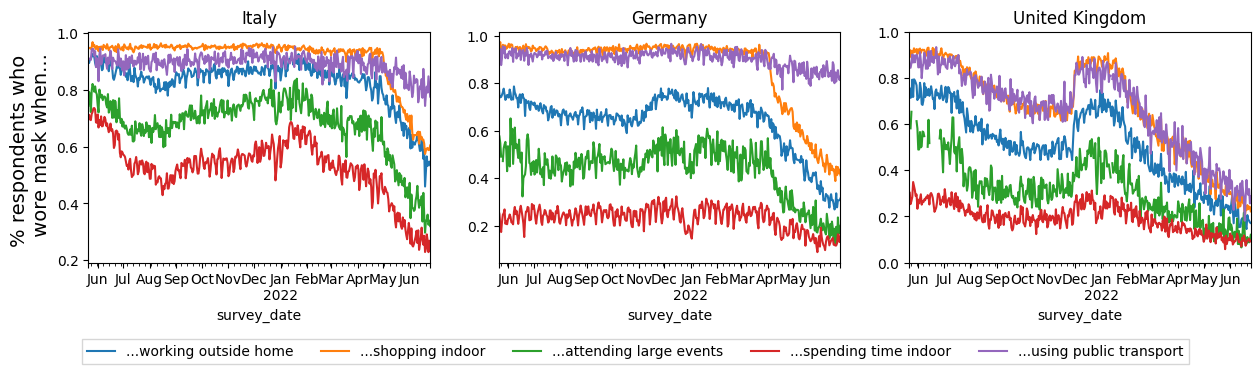

In [13]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

df_IT_b1.plot(x="survey_date", y="pct_mask_work_outside_home_1d",ax=ax[0])
df_IT_b2.plot(x="survey_date", y="pct_mask_shop_1d",ax=ax[0])
df_IT_b3.plot(x="survey_date", y="pct_mask_large_event_1d",ax=ax[0])
df_IT_b4.plot(x="survey_date", y="pct_mask_spent_time_1d",ax=ax[0])
df_IT_b5.plot(x="survey_date", y="pct_mask_public_transit_1d",ax=ax[0])
ax[0].set_ylabel("% respondents who \n wore mask when...", fontsize=14)
ax[0].set_title("Italy")
ax[0].get_legend().remove()

df_DE_b1.plot(x="survey_date", y="pct_mask_work_outside_home_1d",ax=ax[1])
df_DE_b2.plot(x="survey_date", y="pct_mask_shop_1d",ax=ax[1])
df_DE_b3.plot(x="survey_date", y="pct_mask_large_event_1d",ax=ax[1])
df_DE_b4.plot(x="survey_date", y="pct_mask_spent_time_1d",ax=ax[1])
df_DE_b5.plot(x="survey_date", y="pct_mask_public_transit_1d",ax=ax[1])
ax[1].set_title("Germany")
ax[1].get_legend().remove()

df_UK_b1.plot(x="survey_date", y="pct_mask_work_outside_home_1d",ax=ax[2],label="...working outside home")
df_UK_b2.plot(x="survey_date", y="pct_mask_shop_1d",ax=ax[2],label="...shopping indoor")
df_UK_b3.plot(x="survey_date", y="pct_mask_large_event_1d",ax=ax[2],label="...attending large events")
df_UK_b4.plot(x="survey_date", y="pct_mask_spent_time_1d",ax=ax[2],label="...spending time indoor")
df_UK_b5.plot(x="survey_date", y="pct_mask_public_transit_1d",ax=ax[2],label="...using public transport")
ax[2].set_title("United Kingdom")
ax[2].set_ylim([0,1])
#ax[2].legend(bbox_to_anchor=(1.1, 1.05))
ax[2].legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),fancybox=False, shadow=False, ncol=5)


## Believes

In [14]:
# Italy

IT_be1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=worried_catch_covid&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jde1 = json.loads(IT_be1)
df_IT_be1 = pd.DataFrame.from_dict(IT_jde1['data'])
df_IT_be1["survey_date"] = pd.to_datetime(df_IT_be1['survey_date'])

IT_be2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_masking_effective&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jde2 = json.loads(IT_be2)
df_IT_be2 = pd.DataFrame.from_dict(IT_jde2['data'])
df_IT_be2["survey_date"] = pd.to_datetime(df_IT_be2['survey_date'])

IT_be3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=others_masked_public&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jde3 = json.loads(IT_be3)
df_IT_be3 = pd.DataFrame.from_dict(IT_jde3['data'])
df_IT_be3["survey_date"] = pd.to_datetime(df_IT_be3['survey_date'])

IT_be4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_vaccinated_mask_unnecessary&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jde4 = json.loads(IT_be4)
df_IT_be4 = pd.DataFrame.from_dict(IT_jde4['data'])
df_IT_be4["survey_date"] = pd.to_datetime(df_IT_be4['survey_date'])


In [15]:
# Germany

DE_be1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=worried_catch_covid&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jde1 = json.loads(DE_be1)
df_DE_be1 = pd.DataFrame.from_dict(DE_jde1['data'])
df_DE_be1["survey_date"] = pd.to_datetime(df_DE_be1['survey_date'])

DE_be2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_masking_effective&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jde2 = json.loads(DE_be2)
df_DE_be2 = pd.DataFrame.from_dict(DE_jde2['data'])
df_DE_be2["survey_date"] = pd.to_datetime(df_DE_be2['survey_date'])

DE_be3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=others_masked_public&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jde3 = json.loads(DE_be3)
df_DE_be3 = pd.DataFrame.from_dict(DE_jde3['data'])
df_DE_be3["survey_date"] = pd.to_datetime(df_DE_be3['survey_date'])

DE_be4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_vaccinated_mask_unnecessary&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jde4 = json.loads(DE_be4)
df_DE_be4 = pd.DataFrame.from_dict(DE_jde4['data'])
df_DE_be4["survey_date"] = pd.to_datetime(df_DE_be4['survey_date'])


In [16]:
# UK

UK_be1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=worried_catch_covid&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jde1 = json.loads(UK_be1)
df_UK_be1 = pd.DataFrame.from_dict(UK_jde1['data'])
df_UK_be1["survey_date"] = pd.to_datetime(df_UK_be1['survey_date'])

UK_be2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_masking_effective&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jde2 = json.loads(UK_be2)
df_UK_be2 = pd.DataFrame.from_dict(UK_jde2['data'])
df_UK_be2["survey_date"] = pd.to_datetime(df_UK_be2['survey_date'])

UK_be3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=others_masked_public&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jde3 = json.loads(UK_be3)
df_UK_be3 = pd.DataFrame.from_dict(UK_jde3['data'])
df_UK_be3["survey_date"] = pd.to_datetime(df_UK_be3['survey_date'])

UK_be4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=belief_vaccinated_mask_unnecessary&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jde4 = json.loads(UK_be4)
df_UK_be4 = pd.DataFrame.from_dict(UK_jde4['data'])
df_UK_be4["survey_date"] = pd.to_datetime(df_UK_be4['survey_date'])


In [17]:
#df_IT_be4

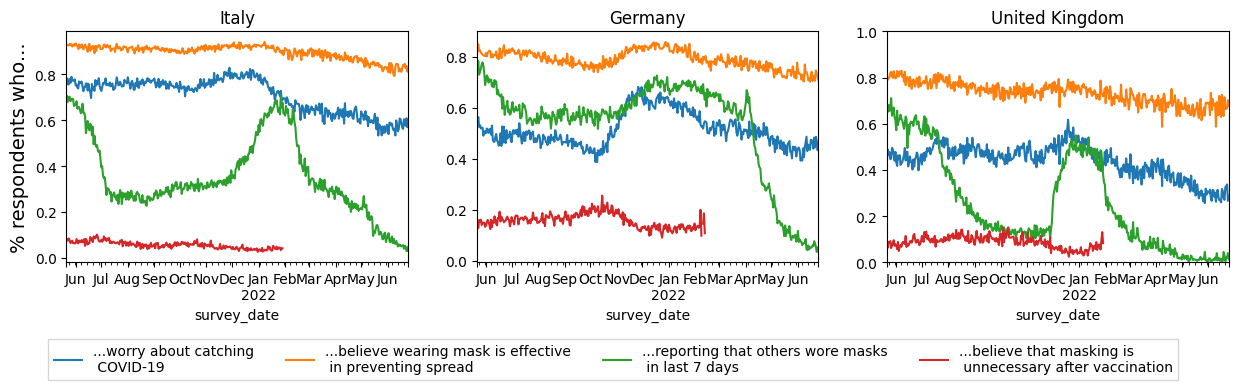

In [18]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

df_IT_be1.plot(x="survey_date", y="pct_worried_catch_covid",ax=ax[0])
df_IT_be2.plot(x="survey_date", y="pct_belief_masking_effective",ax=ax[0])
df_IT_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[0])
df_IT_be4.plot(x="survey_date", y="pct_belief_vaccinated_mask_unnecessary",ax=ax[0])
ax[0].set_ylabel("% respondents who...", fontsize=14)
ax[0].set_title("Italy")
ax[0].get_legend().remove()

df_DE_be1.plot(x="survey_date", y="pct_worried_catch_covid",ax=ax[1])
df_DE_be2.plot(x="survey_date", y="pct_belief_masking_effective",ax=ax[1])
df_DE_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[1])
df_DE_be4.plot(x="survey_date", y="pct_belief_vaccinated_mask_unnecessary",ax=ax[1])
ax[1].set_title("Germany")
ax[1].get_legend().remove()

df_UK_be1.plot(x="survey_date", y="pct_worried_catch_covid",ax=ax[2],label="...worry about catching \n COVID-19")
df_UK_be2.plot(x="survey_date", y="pct_belief_masking_effective",ax=ax[2],label="...believe wearing mask is effective \n in preventing spread")
df_UK_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[2],label="...reporting that others wore masks \n in last 7 days")
df_UK_be4.plot(x="survey_date", y="pct_belief_vaccinated_mask_unnecessary",ax=ax[2],label="...believe that masking is \n unnecessary after vaccination")
ax[2].set_title("United Kingdom")
ax[2].set_ylim([0,1])
#ax[2].legend(bbox_to_anchor=(1.1, 1.05))
ax[2].legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),fancybox=False, shadow=False, ncol=5)


#ax.set_ylabel("% respondents who wore mask when ...")

### Comparison
% who reports wearing a mask vs % who reports that others wear a mask

Text(0.5, 1.0, 'United Kingdom')

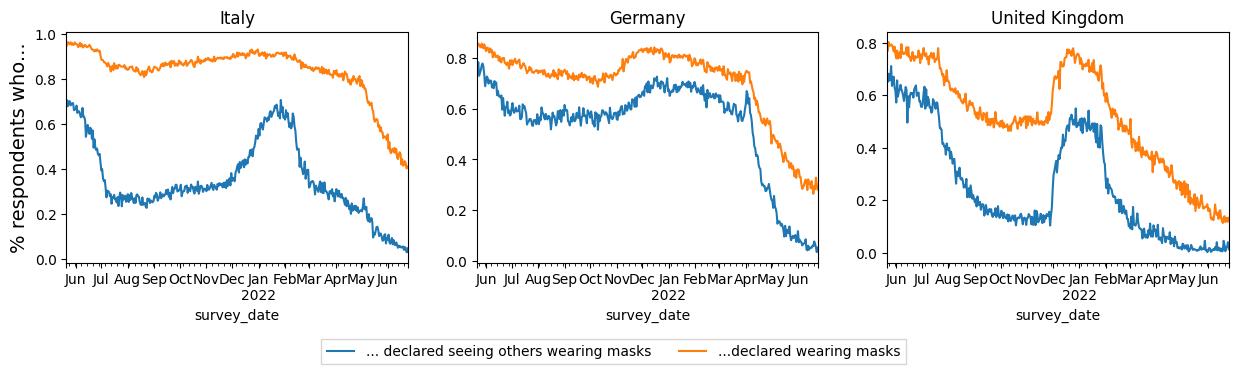

In [19]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

df_IT_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[0])
df_IT.iloc[392:].plot(x="survey_date", y="percent_mc",ax=ax[0])
ax[0].set_ylabel("% respondents who...", fontsize=14)
ax[0].set_title("Italy")
ax[0].get_legend().remove()

df_DE_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[1])
df_DE.iloc[392:].plot(x="survey_date", y="percent_mc",ax=ax[1])
ax[1].set_title("Germany")
ax[1].get_legend().remove()

df_UK_be3.plot(x="survey_date", y="pct_others_masked_public",ax=ax[2],label="... declared seeing others wearing masks")
df_UK.iloc[392:].plot(x="survey_date", y="percent_mc",ax=ax[2],label="...declared wearing masks")
ax[2].legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),fancybox=False, shadow=False, ncol=5)
ax[2].set_title("United Kingdom")


(0.0, 1.0)

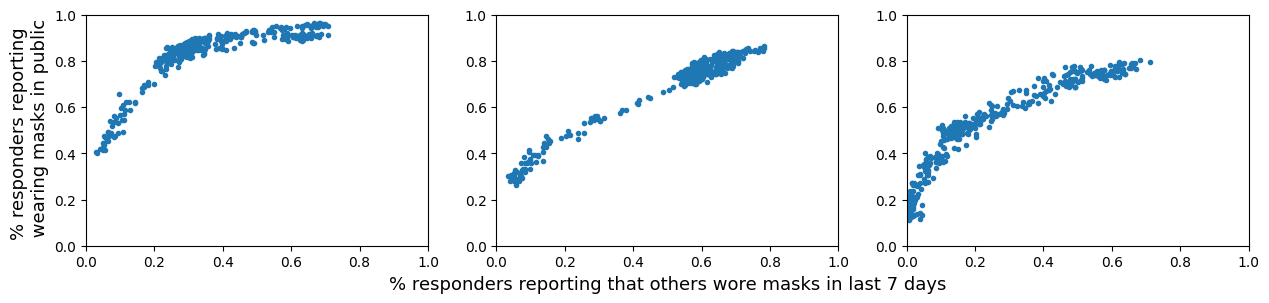

In [20]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

ax[0].plot(df_IT_be3["pct_others_masked_public"], df_IT["percent_mc"].iloc[392:], '.')
ax[0].set_ylim([0,1])
ax[0].set_xlim([0,1])
ax[0].set_ylabel("% responders reporting \n wearing masks in public", fontsize = 13)

ax[1].plot(df_DE_be3["pct_others_masked_public"], df_DE["percent_mc"].iloc[392:], '.')
ax[1].set_ylim([0,1])
ax[1].set_xlim([0,1])
ax[1].set_xlabel("% responders reporting that others wore masks in last 7 days", fontsize= 13)

ax[2].plot(df_UK_be3["pct_others_masked_public"], df_UK["percent_mc"].iloc[392:], '.')
ax[2].set_ylim([0,1])
ax[2].set_xlim([0,1])

## Awareness
Did they receive news?

In [21]:
# Italy

IT_a1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_local_health&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda1 = json.loads(IT_a1)
df_IT_a1 = pd.DataFrame.from_dict(IT_jda1['data'])
df_IT_a1["survey_date"] = pd.to_datetime(df_IT_a1['survey_date'])

IT_a2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_experts&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda2 = json.loads(IT_a2)
df_IT_a2 = pd.DataFrame.from_dict(IT_jda2['data'])
df_IT_a2["survey_date"] = pd.to_datetime(df_IT_a2['survey_date'])

IT_a3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_who&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda3 = json.loads(IT_a3)
df_IT_a3 = pd.DataFrame.from_dict(IT_jda3['data'])
df_IT_a3["survey_date"] = pd.to_datetime(df_IT_a3['survey_date'])

IT_a4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_govt_health&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda4 = json.loads(IT_a4)
df_IT_a4 = pd.DataFrame.from_dict(IT_jda4['data'])
df_IT_a4["survey_date"] = pd.to_datetime(df_IT_a4['survey_date'])

IT_a5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_politicians&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda5 = json.loads(IT_a5)
df_IT_a5 = pd.DataFrame.from_dict(IT_jda5['data'])
df_IT_a5["survey_date"] = pd.to_datetime(df_IT_a5['survey_date'])


IT_a6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_journalists&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda6 = json.loads(IT_a6)
df_IT_a6 = pd.DataFrame.from_dict(IT_jda6['data'])
df_IT_a6["survey_date"] = pd.to_datetime(df_IT_a6['survey_date'])


IT_a7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_friends&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jda7 = json.loads(IT_a7)
df_IT_a7 = pd.DataFrame.from_dict(IT_jda7['data'])
df_IT_a7["survey_date"] = pd.to_datetime(df_IT_a7['survey_date'])

In [22]:
# Germany

DE_a1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_local_health&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda1 = json.loads(DE_a1)
df_DE_a1 = pd.DataFrame.from_dict(DE_jda1['data'])
df_DE_a1["survey_date"] = pd.to_datetime(df_DE_a1['survey_date'])

DE_a2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_experts&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda2 = json.loads(DE_a2)
df_DE_a2 = pd.DataFrame.from_dict(DE_jda2['data'])
df_DE_a2["survey_date"] = pd.to_datetime(df_DE_a2['survey_date'])

DE_a3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_who&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda3 = json.loads(DE_a3)
df_DE_a3 = pd.DataFrame.from_dict(DE_jda3['data'])
df_DE_a3["survey_date"] = pd.to_datetime(df_DE_a3['survey_date'])

DE_a4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_govt_health&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda4 = json.loads(DE_a4)
df_DE_a4 = pd.DataFrame.from_dict(DE_jda4['data'])
df_DE_a4["survey_date"] = pd.to_datetime(df_DE_a4['survey_date'])

DE_a5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_politicians&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda5 = json.loads(DE_a5)
df_DE_a5 = pd.DataFrame.from_dict(DE_jda5['data'])
df_DE_a5["survey_date"] = pd.to_datetime(df_DE_a5['survey_date'])

DE_a6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_journalists&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda6 = json.loads(DE_a6)
df_DE_a6 = pd.DataFrame.from_dict(DE_jda6['data'])
df_DE_a6["survey_date"] = pd.to_datetime(df_DE_a6['survey_date'])

DE_a7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_friends&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jda7 = json.loads(DE_a7)
df_DE_a7 = pd.DataFrame.from_dict(DE_jda7['data'])
df_DE_a7["survey_date"] = pd.to_datetime(df_DE_a7['survey_date'])

In [23]:
# UK

UK_a1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_local_health&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda1 = json.loads(UK_a1)
df_UK_a1 = pd.DataFrame.from_dict(UK_jda1['data'])
df_UK_a1["survey_date"] = pd.to_datetime(df_UK_a1['survey_date'])

UK_a2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_experts&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda2 = json.loads(UK_a2)
df_UK_a2 = pd.DataFrame.from_dict(UK_jda2['data'])
df_UK_a2["survey_date"] = pd.to_datetime(df_UK_a2['survey_date'])

UK_a3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_who&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda3 = json.loads(UK_a3)
df_UK_a3 = pd.DataFrame.from_dict(UK_jda3['data'])
df_UK_a3["survey_date"] = pd.to_datetime(df_UK_a3['survey_date'])

UK_a4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_govt_health&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda4 = json.loads(UK_a4)
df_UK_a4 = pd.DataFrame.from_dict(UK_jda4['data'])
df_UK_a4["survey_date"] = pd.to_datetime(df_UK_a4['survey_date'])

UK_a5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_politicians&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda5 = json.loads(UK_a5)
df_UK_a5 = pd.DataFrame.from_dict(UK_jda5['data'])
df_UK_a5["survey_date"] = pd.to_datetime(df_UK_a5['survey_date'])

UK_a6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_journalists&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda6 = json.loads(UK_a6)
df_UK_a6 = pd.DataFrame.from_dict(UK_jda6['data'])
df_UK_a6["survey_date"] = pd.to_datetime(df_UK_a6['survey_date'])

UK_a7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=received_news_friends&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jda7 = json.loads(UK_a7)
df_UK_a7 = pd.DataFrame.from_dict(UK_jda7['data'])
df_UK_a7["survey_date"] = pd.to_datetime(df_UK_a7['survey_date'])

In [24]:
#df_IT_a7

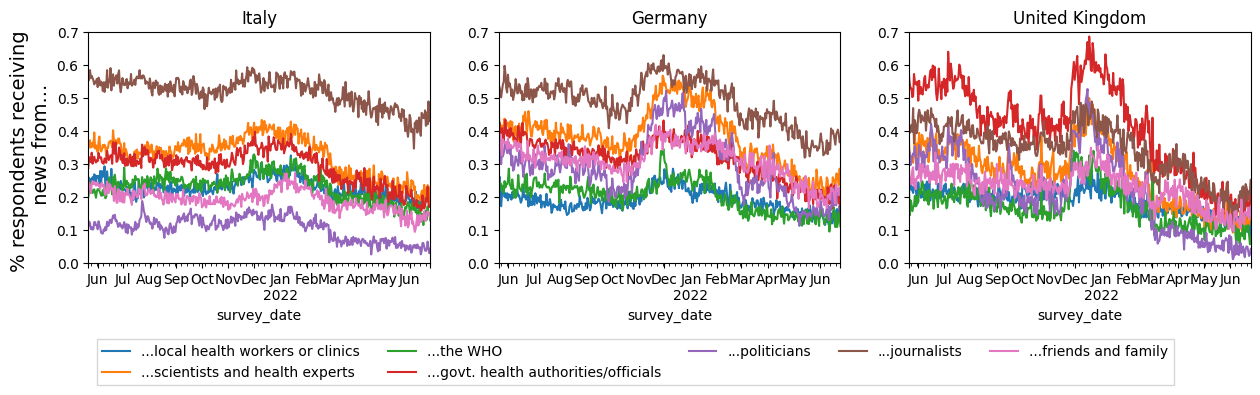

In [25]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

df_IT_a1.plot(x="survey_date", y="pct_received_news_local_health",ax=ax[0])
df_IT_a2.plot(x="survey_date", y="pct_received_news_experts",ax=ax[0])
df_IT_a3.plot(x="survey_date", y="pct_received_news_who",ax=ax[0])
df_IT_a4.plot(x="survey_date", y="pct_received_news_govt_health",ax=ax[0])
df_IT_a5.plot(x="survey_date", y="pct_received_news_politicians",ax=ax[0])
df_IT_a6.plot(x="survey_date", y="pct_received_news_journalists",ax=ax[0])
df_IT_a7.plot(x="survey_date", y="pct_received_news_friends",ax=ax[0])
ax[0].set_ylabel("% respondents receiving \n news from...", fontsize=14)
ax[0].set_title("Italy")
ax[0].set_ylim([0,0.7])
ax[0].get_legend().remove()

df_DE_a1.plot(x="survey_date", y="pct_received_news_local_health",ax=ax[1])
df_DE_a2.plot(x="survey_date", y="pct_received_news_experts",ax=ax[1])
df_DE_a3.plot(x="survey_date", y="pct_received_news_who",ax=ax[1])
df_DE_a4.plot(x="survey_date", y="pct_received_news_govt_health",ax=ax[1])
df_DE_a5.plot(x="survey_date", y="pct_received_news_politicians",ax=ax[1])
df_DE_a6.plot(x="survey_date", y="pct_received_news_journalists",ax=ax[1])
df_DE_a7.plot(x="survey_date", y="pct_received_news_friends",ax=ax[1])
ax[1].set_title("Germany")
ax[1].set_ylim([0,0.7])
ax[1].get_legend().remove()

df_UK_a1.plot(x="survey_date", y="pct_received_news_local_health",ax=ax[2],label="...local health workers or clinics")
df_UK_a2.plot(x="survey_date", y="pct_received_news_experts",ax=ax[2],label="...scientists and health experts")
df_UK_a3.plot(x="survey_date", y="pct_received_news_who",ax=ax[2],label="...the WHO")
df_UK_a4.plot(x="survey_date", y="pct_received_news_govt_health",ax=ax[2],label="...govt. health authorities/officials")
df_UK_a5.plot(x="survey_date", y="pct_received_news_politicians",ax=ax[2],label="...politicians")
df_UK_a6.plot(x="survey_date", y="pct_received_news_journalists",ax=ax[2],label="...journalists")
df_UK_a7.plot(x="survey_date", y="pct_received_news_friends",ax=ax[2],label="...friends and family")
ax[2].set_title("United Kingdom")
ax[2].set_ylim([0,0.7])
#ax[2].legend(bbox_to_anchor=(1.1, 1.05))
ax[2].legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),fancybox=False, shadow=False, ncol=5)


#ax.set_ylabel("% respondents who wore mask when ...")

## Trust
Did they trust the news sources?

In [26]:
# Italy

IT_t1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_local_health&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt1 = json.loads(IT_t1)
df_IT_t1 = pd.DataFrame.from_dict(IT_jdt1['data'])
df_IT_t1["survey_date"] = pd.to_datetime(df_IT_t1['survey_date'])

IT_t2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_experts&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt2 = json.loads(IT_t2)
df_IT_t2 = pd.DataFrame.from_dict(IT_jdt2['data'])
df_IT_t2["survey_date"] = pd.to_datetime(df_IT_t2['survey_date'])

IT_t3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_who&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt3 = json.loads(IT_t3)
df_IT_t3 = pd.DataFrame.from_dict(IT_jdt3['data'])
df_IT_t3["survey_date"] = pd.to_datetime(df_IT_t3['survey_date'])

IT_t4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_govt_health&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt4 = json.loads(IT_t4)
df_IT_t4 = pd.DataFrame.from_dict(IT_jdt4['data'])
df_IT_t4["survey_date"] = pd.to_datetime(df_IT_t4['survey_date'])

IT_t5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_politicians&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt5 = json.loads(IT_t5)
df_IT_t5 = pd.DataFrame.from_dict(IT_jdt5['data'])
df_IT_t5["survey_date"] = pd.to_datetime(df_IT_t5['survey_date'])


IT_t6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_journalists&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt6 = json.loads(IT_t6)
df_IT_t6 = pd.DataFrame.from_dict(IT_jdt6['data'])
df_IT_t6["survey_date"] = pd.to_datetime(df_IT_t6['survey_date'])


IT_t7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_friends&type=daily&country=Italy&daterange=20210521-20220625", verify=False).text
IT_jdt7 = json.loads(IT_t7)
df_IT_t7 = pd.DataFrame.from_dict(IT_jdt7['data'])
df_IT_t7["survey_date"] = pd.to_datetime(df_IT_t7['survey_date'])


In [27]:
# Germany

DE_t1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_local_health&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt1 = json.loads(DE_t1)
df_DE_t1 = pd.DataFrame.from_dict(DE_jdt1['data'])
df_DE_t1["survey_date"] = pd.to_datetime(df_DE_t1['survey_date'])

DE_t2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_experts&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt2 = json.loads(DE_t2)
df_DE_t2 = pd.DataFrame.from_dict(DE_jdt2['data'])
df_DE_t2["survey_date"] = pd.to_datetime(df_DE_t2['survey_date'])

DE_t3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_who&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt3 = json.loads(DE_t3)
df_DE_t3 = pd.DataFrame.from_dict(DE_jdt3['data'])
df_DE_t3["survey_date"] = pd.to_datetime(df_DE_t3['survey_date'])

DE_t4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_govt_health&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt4 = json.loads(DE_t4)
df_DE_t4 = pd.DataFrame.from_dict(DE_jdt4['data'])
df_DE_t4["survey_date"] = pd.to_datetime(df_DE_t4['survey_date'])

DE_t5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_politicians&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt5 = json.loads(DE_t5)
df_DE_t5 = pd.DataFrame.from_dict(DE_jdt5['data'])
df_DE_t5["survey_date"] = pd.to_datetime(df_DE_t5['survey_date'])


DE_t6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_journalists&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt6 = json.loads(DE_t6)
df_DE_t6 = pd.DataFrame.from_dict(DE_jdt6['data'])
df_DE_t6["survey_date"] = pd.to_datetime(df_DE_t6['survey_date'])


DE_t7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_friends&type=daily&country=Germany&daterange=20210521-20220625", verify=False).text
DE_jdt7 = json.loads(DE_t7)
df_DE_t7 = pd.DataFrame.from_dict(DE_jdt7['data'])
df_DE_t7["survey_date"] = pd.to_datetime(df_DE_t7['survey_date'])


In [28]:
# United Kingdom

UK_t1 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_local_health&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt1 = json.loads(UK_t1)
df_UK_t1 = pd.DataFrame.from_dict(UK_jdt1['data'])
df_UK_t1["survey_date"] = pd.to_datetime(df_UK_t1['survey_date'])

UK_t2 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_experts&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt2 = json.loads(UK_t2)
df_UK_t2 = pd.DataFrame.from_dict(UK_jdt2['data'])
df_UK_t2["survey_date"] = pd.to_datetime(df_UK_t2['survey_date'])

UK_t3 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_who&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt3 = json.loads(UK_t3)
df_UK_t3 = pd.DataFrame.from_dict(UK_jdt3['data'])
df_UK_t3["survey_date"] = pd.to_datetime(df_UK_t3['survey_date'])

UK_t4 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_govt_health&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt4 = json.loads(UK_t4)
df_UK_t4 = pd.DataFrame.from_dict(UK_jdt4['data'])
df_UK_t4["survey_date"] = pd.to_datetime(df_UK_t4['survey_date'])

UK_t5 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_politicians&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt5 = json.loads(UK_t5)
df_UK_t5 = pd.DataFrame.from_dict(UK_jdt5['data'])
df_UK_t5["survey_date"] = pd.to_datetime(df_UK_t5['survey_date'])


UK_t6 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_journalists&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt6 = json.loads(UK_t6)
df_UK_t6 = pd.DataFrame.from_dict(UK_jdt6['data'])
df_UK_t6["survey_date"] = pd.to_datetime(df_UK_t6['survey_date'])


UK_t7 = requests.get("https://covidmap.umd.edu/api/resources?indicator=trust_covid_info_friends&type=daily&country=United Kingdom&daterange=20210521-20220625", verify=False).text
UK_jdt7 = json.loads(UK_t7)
df_UK_t7 = pd.DataFrame.from_dict(UK_jdt7['data'])
df_UK_t7["survey_date"] = pd.to_datetime(df_UK_t7['survey_date'])


In [29]:
#df_UK_t1

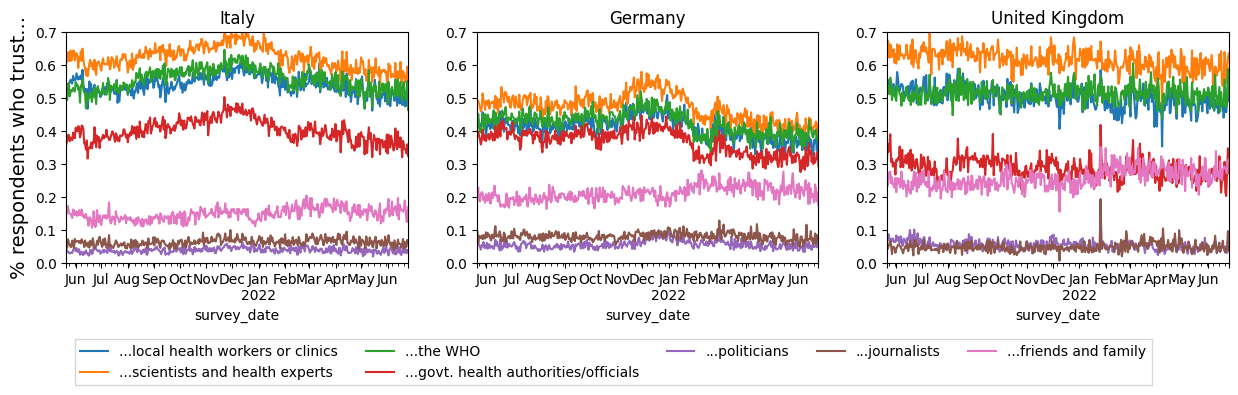

In [30]:
fig, ax = plt.subplots(1,3,figsize = (15,3))

df_IT_t1.plot(x="survey_date", y="pct_trust_covid_info_local_health",ax=ax[0])
df_IT_t2.plot(x="survey_date", y="pct_trust_covid_info_experts",ax=ax[0])
df_IT_t3.plot(x="survey_date", y="pct_trust_covid_info_who",ax=ax[0])
df_IT_t4.plot(x="survey_date", y="pct_trust_covid_info_govt_health",ax=ax[0])
df_IT_t5.plot(x="survey_date", y="pct_trust_covid_info_politicians",ax=ax[0])
df_IT_t6.plot(x="survey_date", y="pct_trust_covid_info_journalists",ax=ax[0])
df_IT_t7.plot(x="survey_date", y="pct_trust_covid_info_friends",ax=ax[0])
ax[0].set_ylabel("% respondents who trust...", fontsize=14)
ax[0].set_title("Italy")
ax[0].set_ylim([0,0.7])
ax[0].get_legend().remove()

df_DE_t1.plot(x="survey_date", y="pct_trust_covid_info_local_health",ax=ax[1])
df_DE_t2.plot(x="survey_date", y="pct_trust_covid_info_experts",ax=ax[1])
df_DE_t3.plot(x="survey_date", y="pct_trust_covid_info_who",ax=ax[1])
df_DE_t4.plot(x="survey_date", y="pct_trust_covid_info_govt_health",ax=ax[1])
df_DE_t5.plot(x="survey_date", y="pct_trust_covid_info_politicians",ax=ax[1])
df_DE_t6.plot(x="survey_date", y="pct_trust_covid_info_journalists",ax=ax[1])
df_DE_t7.plot(x="survey_date", y="pct_trust_covid_info_friends",ax=ax[1])
ax[1].set_title("Germany")
ax[1].set_ylim([0,0.7])
ax[1].get_legend().remove()

df_UK_t1.plot(x="survey_date", y="pct_trust_covid_info_local_health",ax=ax[2],label="...local health workers or clinics")
df_UK_t2.plot(x="survey_date", y="pct_trust_covid_info_experts",ax=ax[2],label="...scientists and health experts")
df_UK_t3.plot(x="survey_date", y="pct_trust_covid_info_who",ax=ax[2],label="...the WHO")
df_UK_t4.plot(x="survey_date", y="pct_trust_covid_info_govt_health",ax=ax[2],label="...govt. health authorities/officials")
df_UK_t5.plot(x="survey_date", y="pct_trust_covid_info_politicians",ax=ax[2],label="...politicians")
df_UK_t6.plot(x="survey_date", y="pct_trust_covid_info_journalists",ax=ax[2],label="...journalists")
df_UK_t7.plot(x="survey_date", y="pct_trust_covid_info_friends",ax=ax[2],label="...friends and family")
ax[2].set_title("United Kingdom")
ax[2].set_ylim([0,0.7])
#ax[2].legend(bbox_to_anchor=(1.1, 1.05))
ax[2].legend(loc='upper center', bbox_to_anchor=(-0.8, -0.3),fancybox=False, shadow=False, ncol=5)


#ax.set_ylabel("% respondents who wore mask when ...")

## Policy interventions
Data extracted from https://ourworldindata.org/covid-face-coverings, based on the [Oxford COVID-19 Government Response Tracker](https://www.bsg.ox.ac.uk/research/research-projects/oxford-covid-19-government-response-tracker), Blavatnik School of Government, University of Oxford – Last updated 10 April 2024 – processed by Our World in Data.

Reference publication for those data:  
Thomas Hale, Noam Angrist, Rafael Goldszmidt, Beatriz Kira, Anna Petherick, Toby Phillips, Samuel Webster, Emily Cameron-Blake, Laura Hallas, Saptarshi Majumdar, and Helen Tatlow. (2021). “A global panel database of pandemic policies (Oxford COVID-19 Government Response Tracker).” Nature Human Behaviour. https://doi.org/10.1038/s41562-021-01079-8

In [31]:
# Dates of policy changes (arbitrary begin, end with other data)
pdates_IT = pd.to_datetime(['2020-02-28', '2020-04-04', '2020-04-05','2021-06-29','2021-06-30','2021-08-31','2021-09-01', '2022-03-03', '2022-03-04','2022-06-25'])
pdates_DE = pd.to_datetime(['2020-02-28', '2020-04-01', '2020-04-02','2021-04-06','2021-04-07','2022-06-25'])
pdates_UK = pd.to_datetime(['2020-02-28', '2020-04-26', '2020-04-27','2020-06-21','2020-06-22','2020-08-16','2020-08-17', '2022-04-19', '2022-04-20','2022-06-25'])

# Stringency of face covering policies (NB: artificial shifts are only done for visual separation of plotted lines)
pstringency_IT = [1,1,5,5,3,3,4,4,3,3]
pstringency_DE = [1.05,1.05,2.05,2.05,3.05,3.05]
pstringency_UK = [0.95,0.95,1.95,1.95,2.95,2.95,3.95,3.95,1.95,1.95]



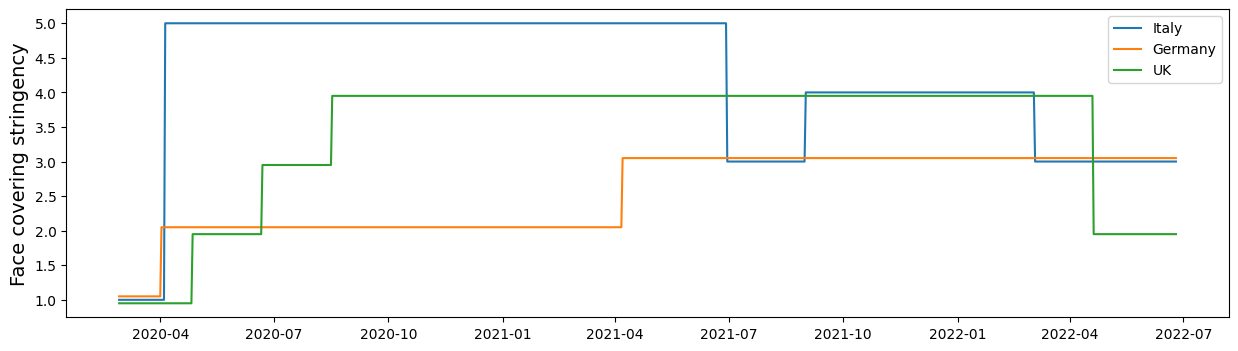

In [32]:
fig = plt.figure(figsize = (15,4))

plt.plot(pdates_IT, pstringency_IT,label="Italy")
plt.plot(pdates_DE, pstringency_DE,label="Germany")
plt.plot(pdates_UK, pstringency_UK,label="UK")
plt.ylabel("Face covering stringency", fontsize = 14)
plt.legend()

## Analysis
On correlations between the various elements

### Behaviours and beliefs
On the effectiveness of masks and on the fear of catching COVID

Italy, Correlation with belief that masks are useful: pears1_IT =  0.8619220555455908 , spear1_IT=  SignificanceResult(statistic=0.7465036215204007, pvalue=1.3566651668387537e-72)
Italy, Correlation with fear of catching COVID-19: pears1_IT =  0.7377589243655948 , spear1_IT=  SignificanceResult(statistic=0.6496884328068293, pvalue=1.8939091601957354e-49)
Germany, Correlation with belief that masks are useful: pears1_IT =  0.8044777449496892 , spear1_IT=  SignificanceResult(statistic=0.8747424349573829, pvalue=1.326513638459652e-127)
Germany, Correlation with fear of catching COVID-19: pears1_IT =  0.5482127491107174 , spear1_IT=  SignificanceResult(statistic=0.7179337104998699, pvalue=9.395578095820625e-65)
UK, Correlation with belief that masks are useful: pears1_IT =  0.8052104218917233 , spear1_IT=  SignificanceResult(statistic=0.807881415863327, pvalue=1.1769372895402858e-93)
UK, Correlation with fear of catching COVID-19: pears1_IT =  0.8154406370717279 , spear1_IT=  SignificanceR

Text(0.7, 0.29, 'Avg $\\rho_P$ = 0.697')

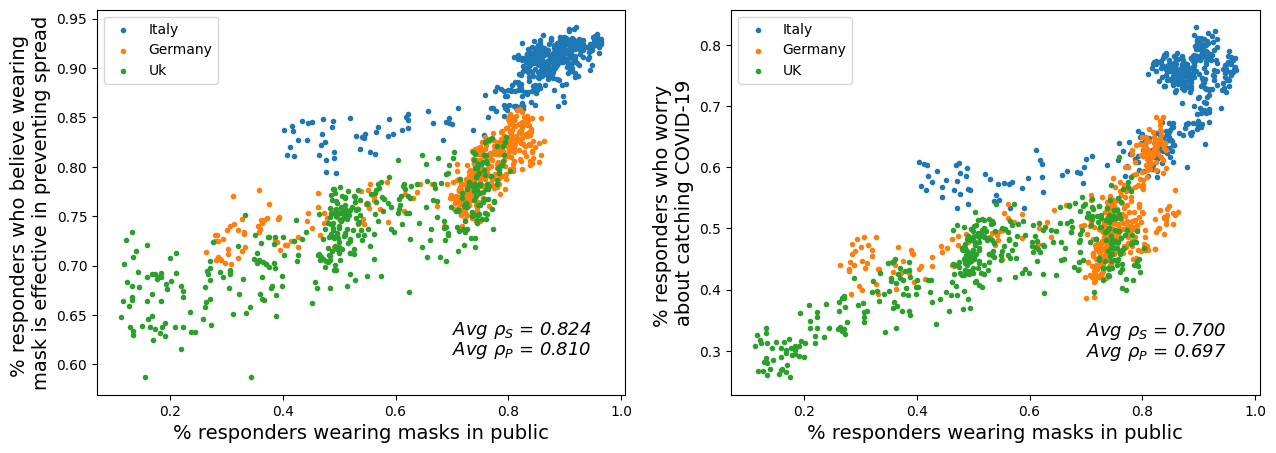

In [33]:
# Italy
pears1_IT = [np.corrcoef(df_IT.iloc[392:]["percent_mc"], df_IT_be2["pct_belief_masking_effective"])[0,1], np.corrcoef(df_IT.iloc[392:]["percent_mc"], df_IT_be1["pct_worried_catch_covid"])[0,1]]
spear1_IT = [sps.spearmanr(df_IT.iloc[392:]["percent_mc"], df_IT_be2["pct_belief_masking_effective"]), sps.spearmanr(df_IT.iloc[392:]["percent_mc"], df_IT_be1["pct_worried_catch_covid"])]

print("Italy, Correlation with belief that masks are useful: pears1_IT = ", pears1_IT[0], ", spear1_IT= ", spear1_IT[0])
print("Italy, Correlation with fear of catching COVID-19: pears1_IT = ", pears1_IT[1], ", spear1_IT= ", spear1_IT[1])

#Germany
pears1_DE = [np.corrcoef(df_DE.iloc[392:]["percent_mc"], df_DE_be2["pct_belief_masking_effective"])[0,1], np.corrcoef(df_DE.iloc[392:]["percent_mc"], df_DE_be1["pct_worried_catch_covid"])[0,1]]
spear1_DE = [sps.spearmanr(df_DE.iloc[392:]["percent_mc"], df_DE_be2["pct_belief_masking_effective"]), sps.spearmanr(df_DE.iloc[392:]["percent_mc"], df_DE_be1["pct_worried_catch_covid"])]

print("Germany, Correlation with belief that masks are useful: pears1_IT = ", pears1_DE[0], ", spear1_IT= ", spear1_DE[0])
print("Germany, Correlation with fear of catching COVID-19: pears1_IT = ", pears1_DE[1], ", spear1_IT= ", spear1_DE[1])

#UK
pears1_UK = [np.corrcoef(df_UK.iloc[392:]["percent_mc"], df_UK_be2["pct_belief_masking_effective"])[0,1], np.corrcoef(df_UK.iloc[392:]["percent_mc"], df_UK_be1["pct_worried_catch_covid"])[0,1]]
spear1_UK = [sps.spearmanr(df_UK.iloc[392:]["percent_mc"], df_UK_be2["pct_belief_masking_effective"]), sps.spearmanr(df_UK.iloc[392:]["percent_mc"], df_UK_be1["pct_worried_catch_covid"])]

print("UK, Correlation with belief that masks are useful: pears1_IT = ", pears1_UK[0], ", spear1_IT= ", spear1_UK[0])
print("UK, Correlation with fear of catching COVID-19: pears1_IT = ", pears1_UK[1], ", spear1_IT= ", spear1_UK[1])

# Plots
fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].scatter(df_IT.iloc[392:]["percent_mc"], df_IT_be2["pct_belief_masking_effective"],marker='.',label="Italy")
ax[0].scatter(df_DE.iloc[392:]["percent_mc"], df_DE_be2["pct_belief_masking_effective"],marker='.',label="Germany")
ax[0].scatter(df_UK.iloc[392:]["percent_mc"], df_UK_be2["pct_belief_masking_effective"],marker='.',label="Uk")
ax[0].set_xlabel("% responders wearing masks in public", fontsize = 14)
ax[0].set_ylabel("% responders who believe wearing \nmask is effective in preventing spread", fontsize = 14)
ax[0].legend()
ax[0].text(0.7,0.63,'Avg $\\rho_S$ = 0.824',style='italic', fontsize = 13)
ax[0].text(0.7,0.61,'Avg $\\rho_P$ = 0.810',style='italic', fontsize = 13)


ax[1].scatter(df_IT.iloc[392:]["percent_mc"], df_IT_be1["pct_worried_catch_covid"],marker='.', label="Italy")
ax[1].scatter(df_DE.iloc[392:]["percent_mc"], df_DE_be1["pct_worried_catch_covid"],marker='.', label="Germany")
ax[1].scatter(df_UK.iloc[392:]["percent_mc"], df_UK_be1["pct_worried_catch_covid"],marker='.', label="UK")
ax[1].set_xlabel("% responders wearing masks in public", fontsize = 14)
ax[1].set_ylabel("% responders who worry \nabout catching COVID-19", fontsize = 14)
ax[1].legend()
ax[1].text(0.7,0.325,'Avg $\\rho_S$ = 0.700',style='italic', fontsize = 13)
ax[1].text(0.7,0.29,'Avg $\\rho_P$ = 0.697',style='italic', fontsize = 13)


### Behaviours and Awareness

Italy, Correlation with avg awareness: pears1_IT =  0.8241543803985333 , spear1_IT=  SignificanceResult(statistic=0.8235276930587576, pvalue=2.8117821886356416e-100)
Germany, Correlation with avg awareness: pears1_DE =  0.8551571263655728 , spear1_DE=  SignificanceResult(statistic=0.9143475267056241, pvalue=9.651962779923757e-159)
UK, Correlation with avg awareness: pears1_UK =  0.941408096452579 , spear1_UK=  SignificanceResult(statistic=0.9145678713663603, pvalue=5.906182324173646e-159)


Text(0.7, 0.1, 'Avg $\\rho_P$ = 0.884')

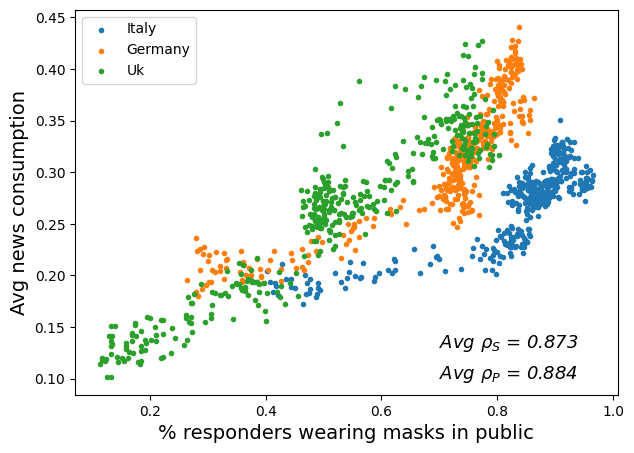

In [34]:
# Italy
df_IT_atot = df_IT_a1
df_IT_atot["avg values"]= (df_IT_a1.iloc[:,0] + df_IT_a2.iloc[:,0] + df_IT_a3.iloc[:,0] + df_IT_a4.iloc[:,0] + df_IT_a5.iloc[:,0] + df_IT_a6.iloc[:,0] + df_IT_a7.iloc[:,0])/7
df_IT_atot["survey_date"] = pd.to_datetime(df_IT_a6['survey_date'])

pears2_IT = np.corrcoef(df_IT_atot["avg values"], df_IT.iloc[392:]["percent_mc"])[0,1]
spear2_IT = sps.spearmanr(df_IT_atot["avg values"], df_IT.iloc[392:]["percent_mc"])

print("Italy, Correlation with avg awareness: pears1_IT = ", pears2_IT, ", spear1_IT= ", spear2_IT)

# Germany
df_DE_atot = df_DE_a1
df_DE_atot["avg values"]= (df_DE_a1.iloc[:,0] + df_DE_a2.iloc[:,0] + df_DE_a3.iloc[:,0] + df_DE_a4.iloc[:,0] + df_DE_a5.iloc[:,0] + df_DE_a6.iloc[:,0] + df_DE_a7.iloc[:,0])/7
df_DE_atot["survey_date"] = pd.to_datetime(df_DE_a6['survey_date'])

pears2_DE = np.corrcoef(df_DE_atot["avg values"], df_DE.iloc[392:]["percent_mc"])[0,1]
spear2_DE = sps.spearmanr(df_DE_atot["avg values"], df_DE.iloc[392:]["percent_mc"])

print("Germany, Correlation with avg awareness: pears1_DE = ", pears2_DE, ", spear1_DE= ", spear2_DE)

# UK
df_UK_atot = df_UK_a1
df_UK_atot["avg values"]= (df_UK_a1.iloc[:,0] + df_UK_a2.iloc[:,0] + df_UK_a3.iloc[:,0] + df_UK_a4.iloc[:,0] + df_UK_a5.iloc[:,0] + df_UK_a6.iloc[:,0] + df_UK_a7.iloc[:,0])/7
df_UK_atot["survey_date"] = pd.to_datetime(df_UK_a6['survey_date'])

pears2_UK = np.corrcoef(df_UK_atot["avg values"], df_UK.iloc[392:]["percent_mc"])[0,1]
spear2_UK = sps.spearmanr(df_UK_atot["avg values"], df_UK.iloc[392:]["percent_mc"])

print("UK, Correlation with avg awareness: pears1_UK = ", pears2_UK, ", spear1_UK= ", spear2_UK)

# Plots
fig, ax = plt.subplots(1,figsize = (7,5))
ax.scatter(df_IT.iloc[392:]["percent_mc"], df_IT_atot["avg values"],marker='.',label="Italy")
ax.scatter(df_DE.iloc[392:]["percent_mc"], df_DE_atot["avg values"],marker='.',label="Germany")
ax.scatter(df_UK.iloc[392:]["percent_mc"], df_UK_atot["avg values"],marker='.',label="Uk")
ax.set_xlabel("% responders wearing masks in public", fontsize = 14)
ax.set_ylabel("Avg news consumption", fontsize = 14)
ax.legend()
ax.text(0.7,0.13,'Avg $\\rho_S$ = 0.873',style='italic', fontsize = 13)
ax.text(0.7,0.10,'Avg $\\rho_P$ = 0.884',style='italic', fontsize = 13)

#### Weighted awareness by trust

Italy, Correlation with avg weighted awareness: pears1_IT =  0.8068937770469928 , spear1_IT=  SignificanceResult(statistic=0.8161802032316701, pvalue=4.338329651125673e-97)
Germany, Correlation with avg weighted awareness: pears1_DE =  0.8607074834474757 , spear1_DE=  SignificanceResult(statistic=0.9154801429262667, pvalue=7.62056264392646e-160)
UK, Correlation with avg weighted awareness: pears1_UK =  0.9293984609993591 , spear1_UK=  SignificanceResult(statistic=0.9088850634607513, pvalue=1.2477611871499136e-153)


Text(0.7, 0.1, 'Avg $\\rho_P$ = 0.880')

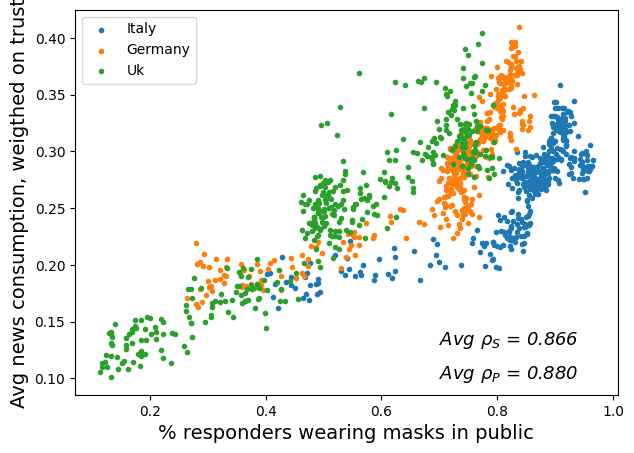

In [35]:
# Italy
df_IT_atot_w = df_IT_a1
df_IT_atot_w["avg values"]= (df_IT_a1.iloc[:,0]*df_IT_t1.iloc[:,0] + df_IT_a2.iloc[:,0]*df_IT_t2.iloc[:,0] + df_IT_a3.iloc[:,0]*df_IT_t3.iloc[:,0] + df_IT_a4.iloc[:,0]*df_IT_t4.iloc[:,0] + df_IT_a5.iloc[:,0]*df_IT_t5.iloc[:,0] + df_IT_a6.iloc[:,0]*df_IT_t6.iloc[:,0] + df_IT_a7.iloc[:,0]*df_IT_t7.iloc[:,0])/(df_IT_t1.iloc[:,0] + df_IT_t2.iloc[:,0] + df_IT_t3.iloc[:,0] + df_IT_t4.iloc[:,0] + df_IT_t5.iloc[:,0] + df_IT_t6.iloc[:,0] + df_IT_t7.iloc[:,0])
df_IT_atot_w["survey_date"] = pd.to_datetime(df_IT_a6['survey_date'])

pears2_IT_w = np.corrcoef(df_IT_atot_w["avg values"], df_IT.iloc[392:]["percent_mc"])[0,1]
spear2_IT_w = sps.spearmanr(df_IT_atot_w["avg values"], df_IT.iloc[392:]["percent_mc"])

print("Italy, Correlation with avg weighted awareness: pears1_IT = ", pears2_IT_w, ", spear1_IT= ", spear2_IT_w)

# Germany
df_DE_atot_w = df_DE_a1
df_DE_atot_w["avg values"]= (df_DE_a1.iloc[:,0]*df_DE_t1.iloc[:,0] + df_DE_a2.iloc[:,0]*df_DE_t2.iloc[:,0] + df_DE_a3.iloc[:,0]*df_DE_t3.iloc[:,0] + df_DE_a4.iloc[:,0]*df_DE_t4.iloc[:,0] + df_DE_a5.iloc[:,0]*df_DE_t5.iloc[:,0] + df_DE_a6.iloc[:,0]*df_DE_t6.iloc[:,0] + df_DE_a7.iloc[:,0]*df_DE_t7.iloc[:,0])/(df_DE_t1.iloc[:,0] + df_DE_t2.iloc[:,0] + df_DE_t3.iloc[:,0] + df_DE_t4.iloc[:,0] + df_DE_t5.iloc[:,0] + df_DE_t6.iloc[:,0] + df_DE_t7.iloc[:,0])
df_DE_atot_w["survey_date"] = pd.to_datetime(df_DE_a6['survey_date'])

pears2_DE_w = np.corrcoef(df_DE_atot_w["avg values"], df_DE.iloc[392:]["percent_mc"])[0,1]
spear2_DE_w = sps.spearmanr(df_DE_atot_w["avg values"], df_DE.iloc[392:]["percent_mc"])

print("Germany, Correlation with avg weighted awareness: pears1_DE = ", pears2_DE_w, ", spear1_DE= ", spear2_DE_w)

# UK
df_UK_atot_w = df_UK_a1
df_UK_atot_w["avg values"]= (df_UK_a1.iloc[:,0]*df_UK_t1.iloc[:,0] + df_UK_a2.iloc[:,0]*df_UK_t2.iloc[:,0] + df_UK_a3.iloc[:,0]*df_UK_t3.iloc[:,0] + df_UK_a4.iloc[:,0]*df_UK_t4.iloc[:,0] + df_UK_a5.iloc[:,0]*df_UK_t5.iloc[:,0] + df_UK_a6.iloc[:,0]*df_UK_t6.iloc[:,0] + df_UK_a7.iloc[:,0]*df_UK_t7.iloc[:,0])/(df_UK_t1.iloc[:,0] + df_UK_t2.iloc[:,0] + df_UK_t3.iloc[:,0] + df_UK_t4.iloc[:,0] + df_UK_t5.iloc[:,0] + df_UK_t6.iloc[:,0] + df_UK_t7.iloc[:,0])
df_UK_atot_w["survey_date"] = pd.to_datetime(df_UK_a6['survey_date'])

pears2_UK_w = np.corrcoef(df_UK_atot_w["avg values"], df_UK.iloc[392:]["percent_mc"])[0,1]
spear2_UK_w = sps.spearmanr(df_UK_atot_w["avg values"], df_UK.iloc[392:]["percent_mc"])

print("UK, Correlation with avg weighted awareness: pears1_UK = ", pears2_UK_w, ", spear1_UK= ", spear2_UK_w)

# Plots
fig, ax = plt.subplots(1,figsize = (7,5))
ax.scatter(df_IT.iloc[392:]["percent_mc"], df_IT_atot_w["avg values"],marker='.',label="Italy")
ax.scatter(df_DE.iloc[392:]["percent_mc"], df_DE_atot_w["avg values"],marker='.',label="Germany")
ax.scatter(df_UK.iloc[392:]["percent_mc"], df_UK_atot_w["avg values"],marker='.',label="Uk")
ax.set_xlabel("% responders wearing masks in public", fontsize = 14)
ax.set_ylabel("Avg news consumption, weigthed on trust", fontsize = 14)
ax.legend()
ax.text(0.7,0.13,'Avg $\\rho_S$ = 0.866',style='italic', fontsize = 13)
ax.text(0.7,0.10,'Avg $\\rho_P$ = 0.880',style='italic', fontsize = 13)

### Behaviours and policies

Text(0, 0.5, '% responders wearing masks in public')

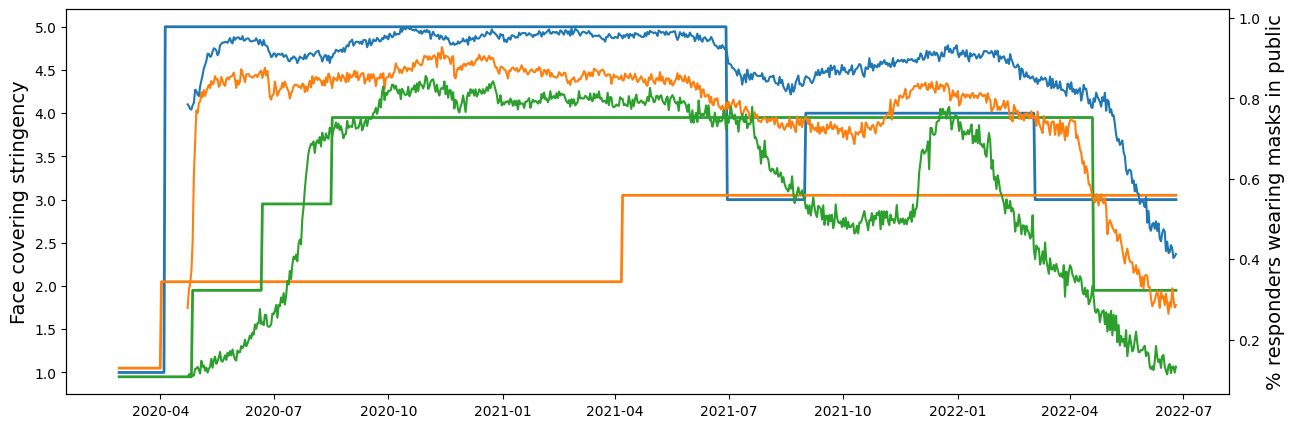

In [36]:
fig, ax = plt.subplots(1,figsize = (15,5))
ax.plot(pdates_IT, pstringency_IT,label="Italy", linewidth=2)
ax.plot(pdates_DE, pstringency_DE,label="Germany", linewidth=2)
ax.plot(pdates_UK, pstringency_UK,label="UK", linewidth=2)
ax.set_ylabel("Face covering stringency",fontsize=14)

ax2 = ax.twinx()
ax2.plot(df_IT["survey_date"], df_IT["percent_mc"],label="Italy")
ax2.plot(df_DE["survey_date"], df_DE["percent_mc"],label="Germany")
ax2.plot(df_UK["survey_date"], df_UK["percent_mc"],label="UK")
ax2.set_ylabel("% responders wearing masks in public",fontsize=14)

## Behaviours and epidemic data
Data from https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

### Case numbers

In [179]:
url = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=true"
data_IT = pd.read_csv(url).loc[pd.read_csv(url)["Country/Region"] == "Italy"].iloc[:,79:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]
data_DE = pd.read_csv(url).loc[pd.read_csv(url)["Country/Region"] == "Germany"].iloc[:,79:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]
data_UK = pd.read_csv(url).loc[(pd.read_csv(url)["Country/Region"] == "United Kingdom") & (pd.read_csv(url)["Lat"] == 55.3781)].iloc[:,79:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]


Text(0, 0.5, '% respondents who wore masks')

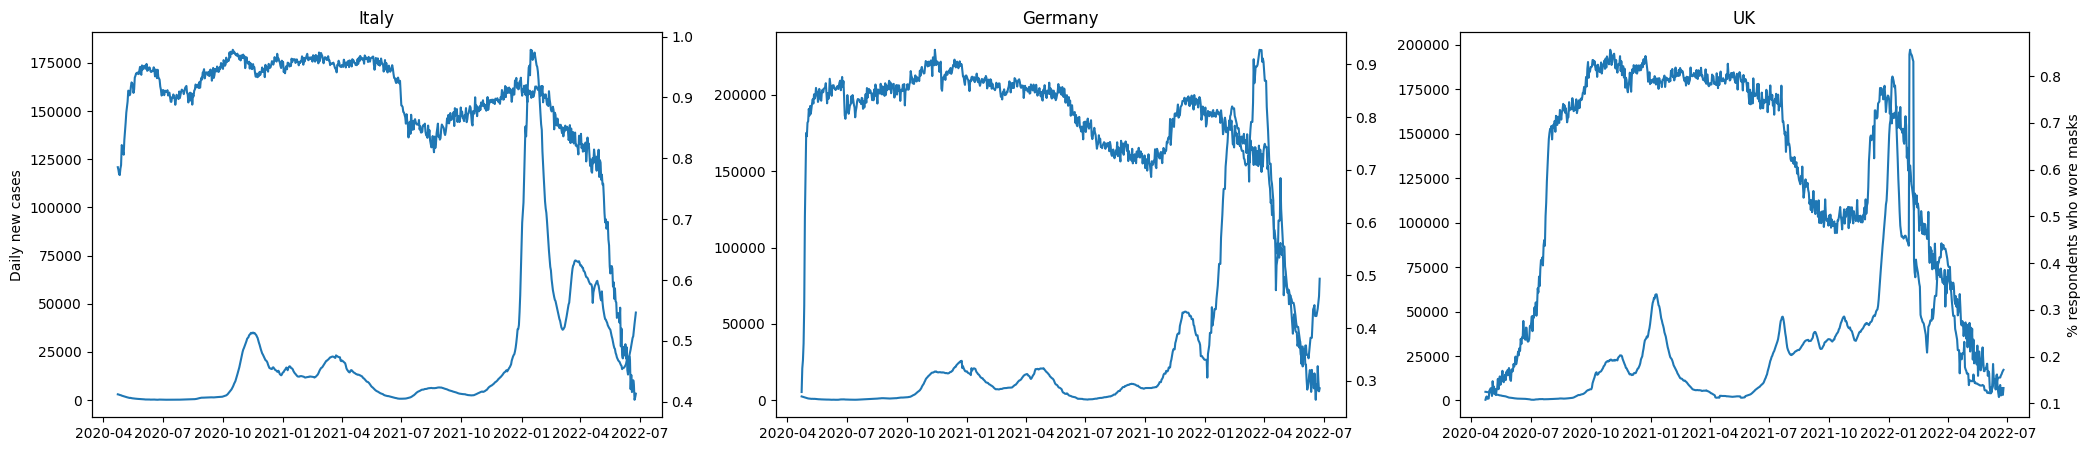

In [180]:
fig, ax = plt.subplots(1,3,figsize = (25,5))
ax[0].plot( df_IT["survey_date"], data_IT.iloc[10:-1].values.flatten())
ax[0].set_ylabel("Daily new cases")
ax[0].set_title("Italy")
ax2 = ax[0].twinx()
ax2.plot(df_IT["survey_date"], df_IT["percent_mc"] )

ax[1].plot( df_DE["survey_date"], data_DE.iloc[10:-1].values.flatten())
ax[1].set_title("Germany")
ax21 = ax[1].twinx()
ax21.plot(df_DE["survey_date"], df_DE["percent_mc"] )

ax[2].plot( df_UK["survey_date"], data_UK.iloc[10:-1].values.flatten())
ax[2].set_title("UK")
ax22 = ax[2].twinx()
ax22.plot(df_UK["survey_date"], df_UK["percent_mc"] )
ax22.set_ylabel("% respondents who wore masks")

### Case fatality rate
Data from https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv. See also https://github.com/owid/covid-19-data/tree/master/public/data

In [176]:
url = "https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv?raw=true"
death_IT = pd.read_csv(url).loc[pd.read_csv(url)["Country/Region"] == "Italy"].iloc[:,89:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]
death_DE = pd.read_csv(url).loc[pd.read_csv(url)["Country/Region"] == "Germany"].iloc[:,89:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]
death_UK = pd.read_csv(url).loc[(pd.read_csv(url)["Country/Region"] == "United Kingdom") & (pd.read_csv(url)["Lat"] == 55.3781)].iloc[:,89:890].transpose().diff().iloc[1:].rolling(7).mean().iloc[6:]


In [183]:
# Case fatality rate (Ourworldindata: " Our rolling-average CFR is calculated as the ratio between the 7-day average number of deaths and the 7-day average number of cases 10 days earlier")
CFR_IT = death_IT.values / data_IT.values[:-10]
CFR_DE = death_DE.values / data_DE.values[:-10]
CFR_UK = death_UK.values / data_UK.values[:-10]


Text(0, 0.5, '% respondents who wore masks')

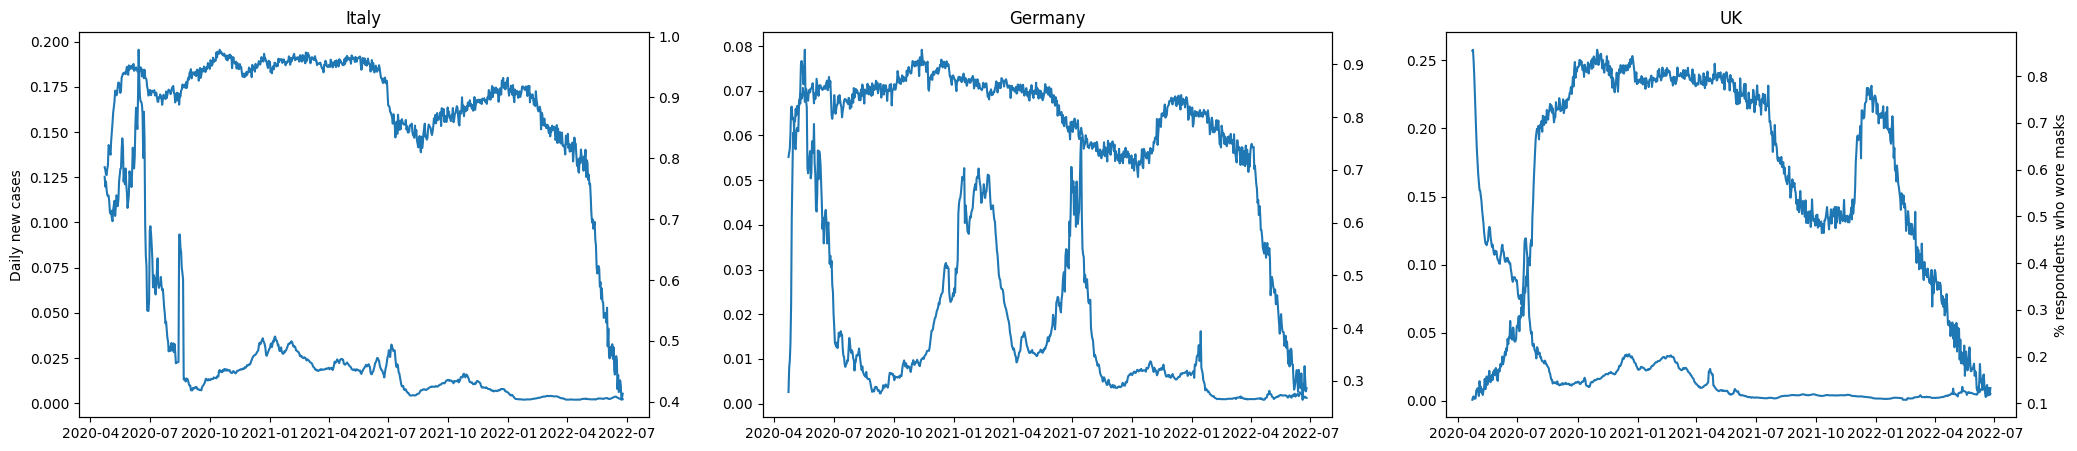

In [187]:
fig, ax = plt.subplots(1,3,figsize = (25,5))
ax[0].plot( df_IT["survey_date"], CFR_IT.flatten()[:-1])
ax[0].set_ylabel("Daily new cases")
ax[0].set_title("Italy")
ax2 = ax[0].twinx()
ax2.plot(df_IT["survey_date"], df_IT["percent_mc"] )

ax[1].plot( df_DE["survey_date"], CFR_DE.flatten()[:-1])
ax[1].set_title("Germany")
ax21 = ax[1].twinx()
ax21.plot(df_DE["survey_date"], df_DE["percent_mc"] )

ax[2].plot( df_UK["survey_date"], CFR_UK.flatten()[:-1])
ax[2].set_title("UK")
ax22 = ax[2].twinx()
ax22.plot(df_UK["survey_date"], df_UK["percent_mc"] )
ax22.set_ylabel("% respondents who wore masks")

## Bottom line

Given the exploration of data and the correlation of behaviours to various elements of a pandemic, both related to contagion and to social instances, we can hypothesise that:
- The majour drivers are policies (at least, at the very beginning and after their relaxation), motivations (but anyway at a lower degree) and case numbers, particularly when rapidly and significantly surging - all mediated by awareness provided by exposure to news (and exposure is sufficient, trust is not extremely necessary)
- Extreme surges in case numbers are more relevant than case fatality rate or other pandemic measures - crude numbers play a role (for future inspections, R(t) may also be considered)
- There is no particular "fatigue" or "memory loss": people remained overall compliant (except for summer 2021, which anyway correlated with lower exposure to news and recommendations
- Majour elements to infuse in a model that aims at recreating patterns are: "mean field" policies, behavioural feedback to cases (weighted), low fatigue rates for being compliant. Behaviours can substitute awareness compartments when considering trajectories over time.